In [106]:
import pandas as pd
import numpy as np
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)

# Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## STORE DATA

### Acquired and Prepped Data

In [107]:
df = prepare.prep_store()
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [108]:
# start and end date range
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

### Splitting the Data

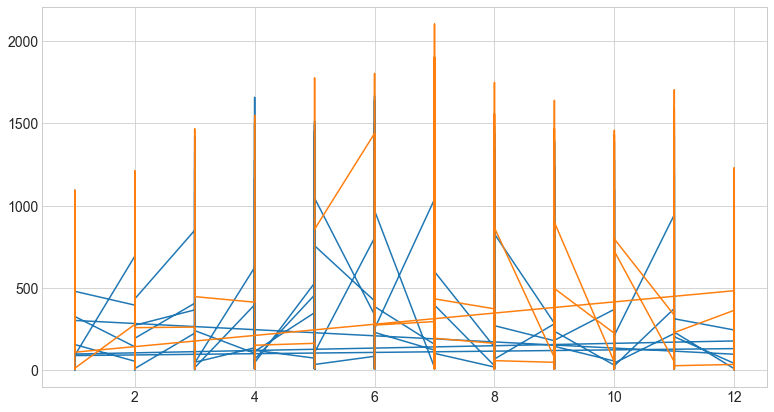

In [109]:
# percentage based training split
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index.month, train.sales_total)
plt.plot(test.index.month, test.sales_total)

#### Target Variable: sales_total per day

In [110]:
y = train.sales_total.resample('d').sum()
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

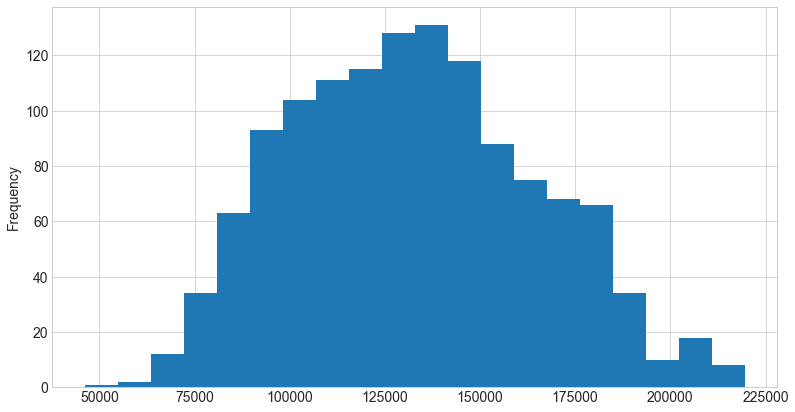

In [111]:
# distribution of target variable
y.plot.hist(bins=20)

[Text(0, 0.5, 'Millions of Dollars'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Total Sales by Month')]

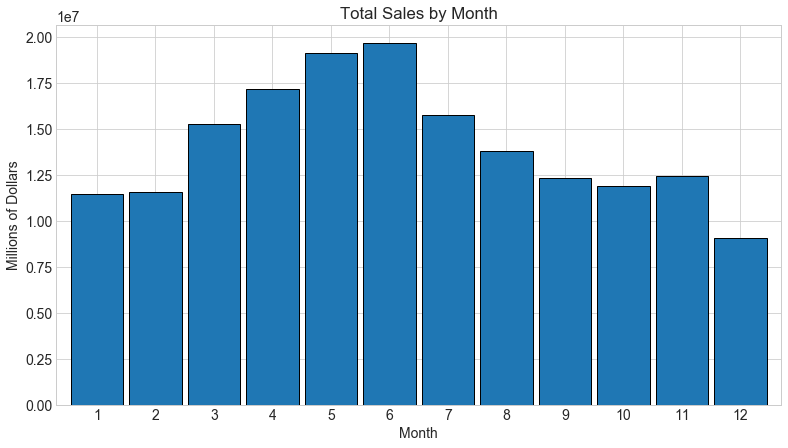

In [112]:
# sum of sales by month
ax1 = y.groupby(y.index.month).sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax1.set(title='Total Sales by Month', xlabel='Month', ylabel='Millions of Dollars')

[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Sales by Month')]

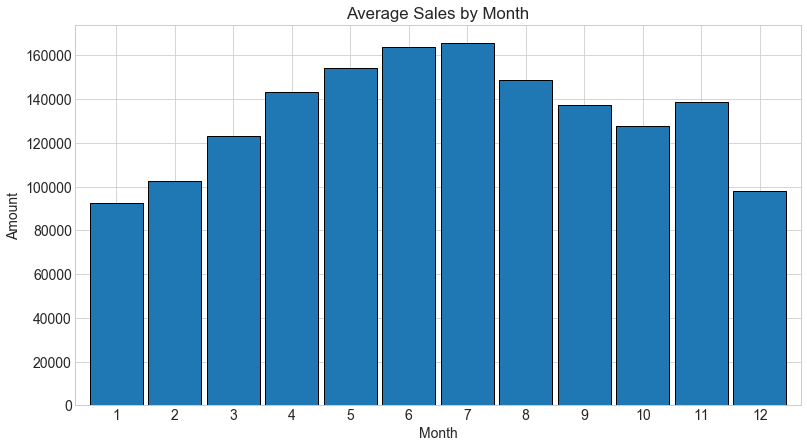

In [113]:
# average sales by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Amount')

#### Add weekday and month columns to the df

In [114]:
train['weekday'] = train.index.day_name()
train['month'] = train.index.month

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(21.200000000000003, 0.5, 'Amount'),
 Text(0.5, 21.200000000000003, 'Weekday'),
 Text(0.5, 1, 'Average Sale by Weekday')]

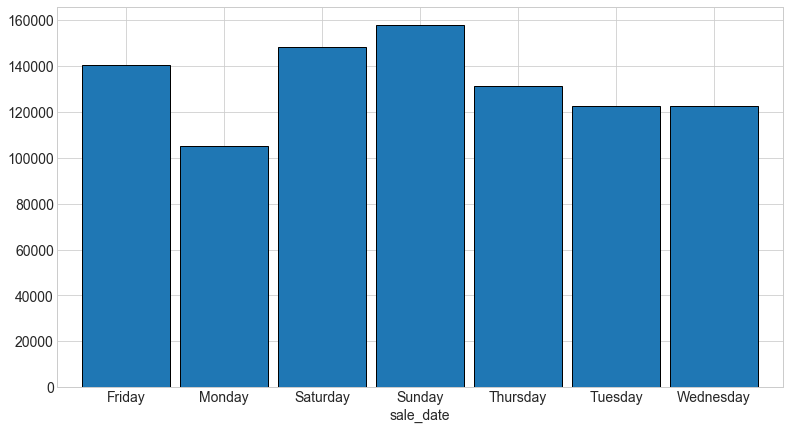

In [115]:
# average sale by weekday
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sale by Weekday', xlabel='Weekday', ylabel='Amount')

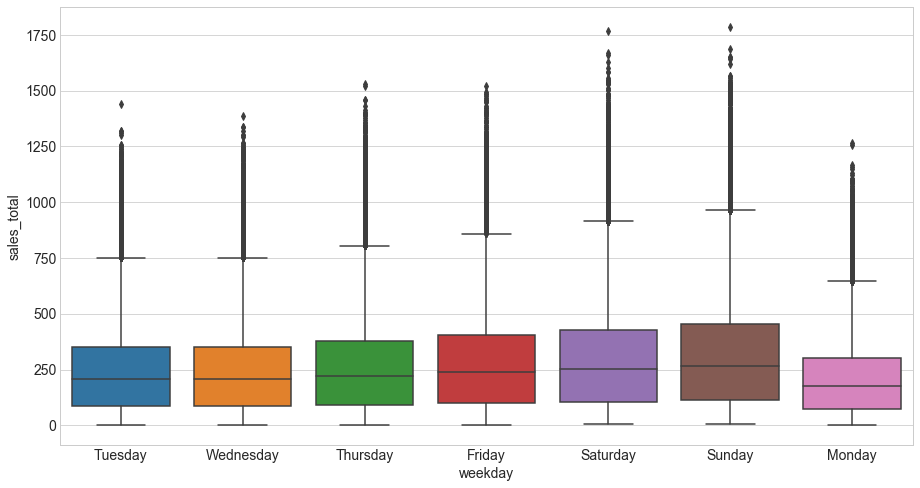

In [116]:
# box plot of target by weekday
sns.boxplot(data=train, y='sales_total', x='weekday')
plt.tight_layout()

### Visualize target over time

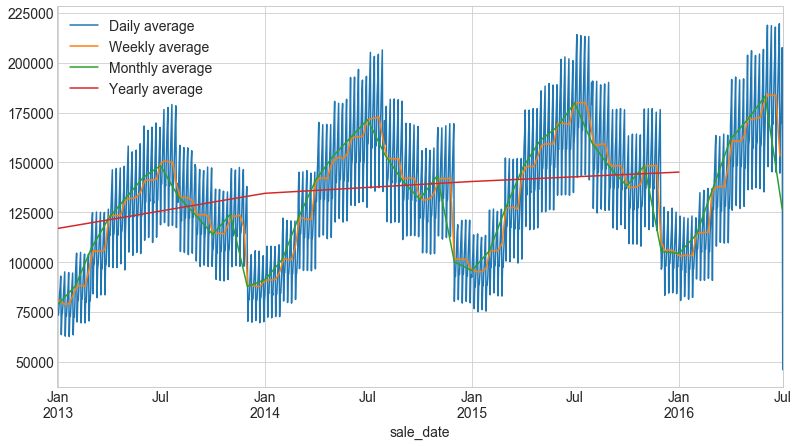

In [117]:
y.resample('D').mean().plot(label='Daily average')
y.resample('W').mean().plot(label='Weekly average')
y.resample('M').mean().plot(label='Monthly average')
y.resample('Y').mean().plot(label='Yearly average')
plt.legend()

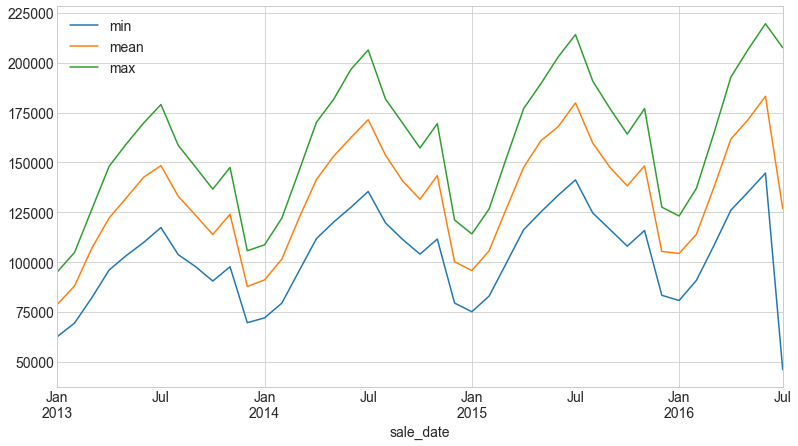

In [118]:
# min, mean, and max of target monthy
y.resample('M').agg(['min', 'mean', 'max']).plot()

### Visualize Change over Time

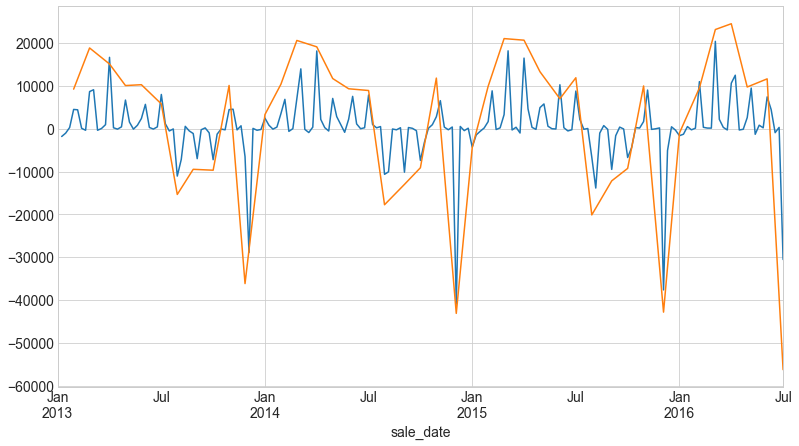

In [119]:
y.resample('W').mean().diff().plot(label='Average week-to-week change in temperature')
y.resample('M').mean().diff().plot(label='Average month-to-month change in temperature')

In [ ]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

---
## OPSD DATA

RE: your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

### Acquired and Prepped Data

In [71]:
op = prepare.prep_ogd()
op.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [72]:
# start and end date range
op.index.min(), op.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

### Splitting the Data

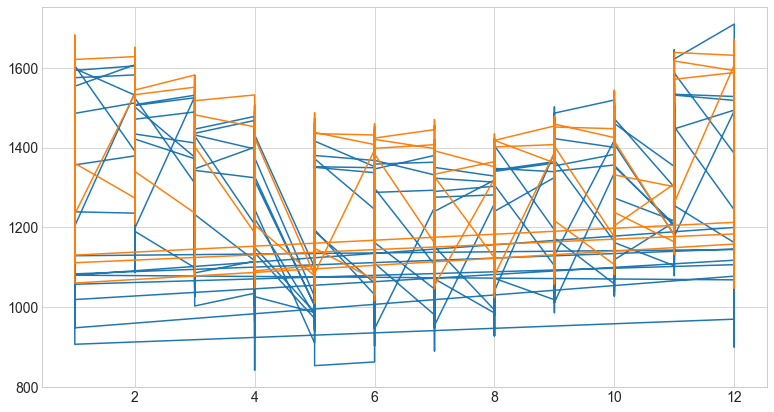

In [74]:
# percentage based training split
train_size = .70
n = op.shape[0]
test_start_index = round(train_size * n)

train2 = op[:test_start_index] # everything up (not including) to the test_start_index
test2 = op[test_start_index:] # everything from the test_start_index to the end

plt.plot(train2.index.month, train2.Consumption)
plt.plot(test2.index.month, test2.Consumption)

#### Target Variable: sales_total per day

In [77]:
y2 = train2.Consumption.resample('d').sum()
y2.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Freq: D, Name: Consumption, dtype: float64

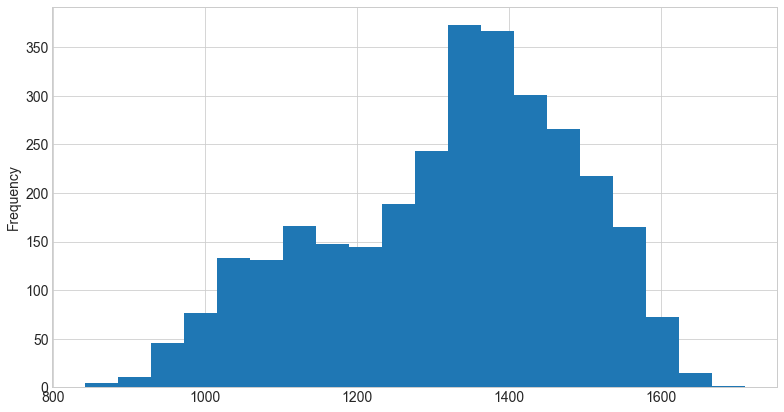

In [78]:
# distribution of target variable
y2.plot.hist(bins=20)

[Text(0, 0.5, 'Consumption'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Total Consumption by Month')]

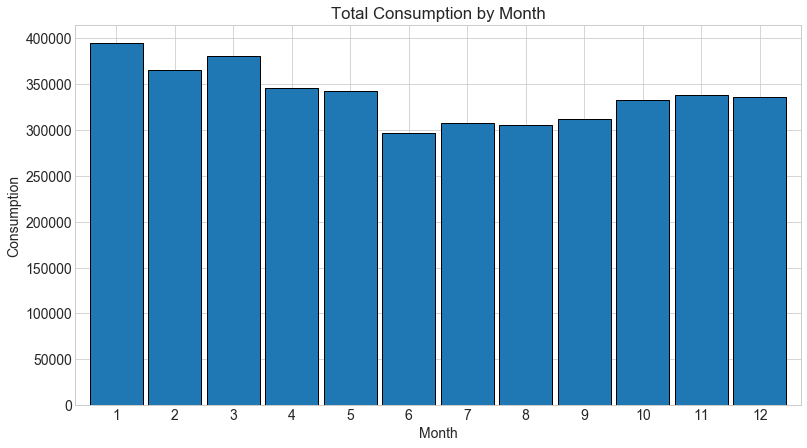

In [85]:
# sum of consumption by month
ax2 = y2.groupby(y2.index.month).sum().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax2.set(title='Total Consumption by Month', xlabel='Month', ylabel='Consumption')

[Text(0, 0.5, 'Amount'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Sales by Month')]

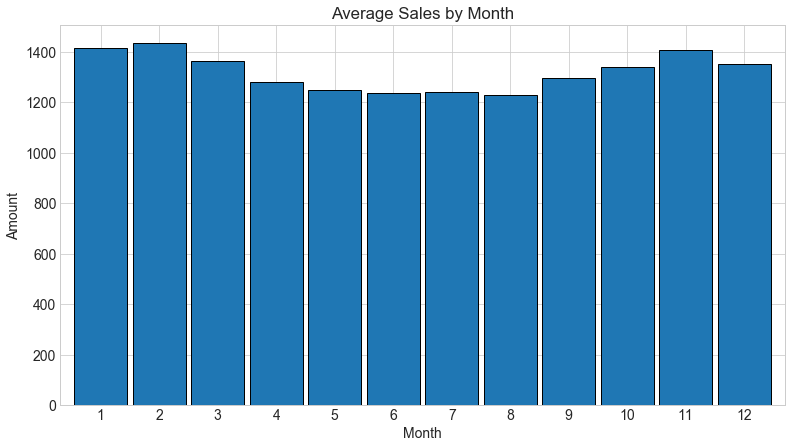

In [81]:
# average sales by month
ax = y2.groupby(y2.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Amount')

#### Add weekday and month columns to the df

In [83]:
train2['weekday'] = train2.index.day_name()
train2['month'] = train2.index.month

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


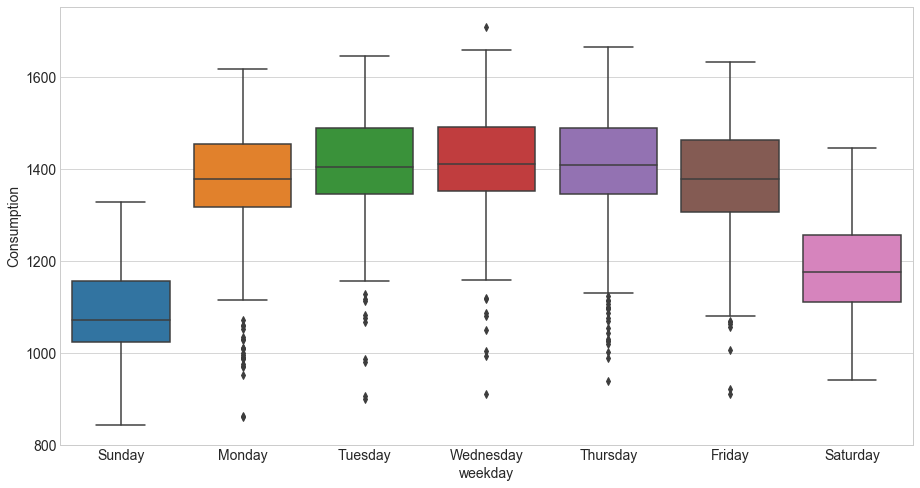

In [86]:
# box plot of target by weekday
sns.boxplot(data=train2, y='Consumption', x='weekday')
plt.tight_layout()

### Visualize target over time

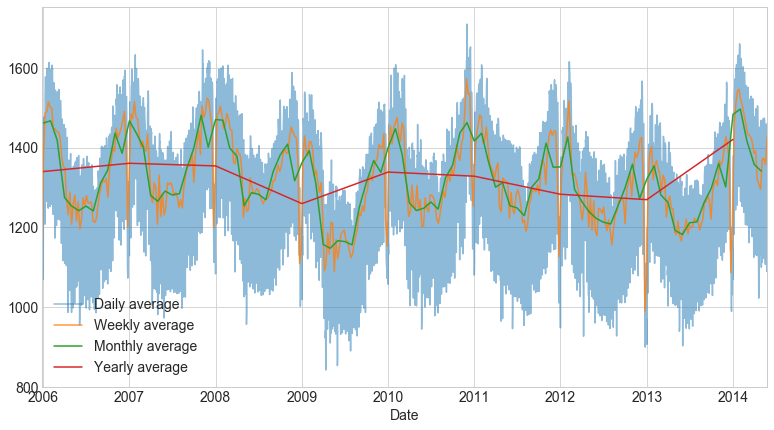

In [93]:
y2.resample('D').mean().plot(alpha= .5, label='Daily average')
y2.resample('W').mean().plot(alpha= .8, label='Weekly average')
y2.resample('M').mean().plot(label='Monthly average')
y2.resample('Y').mean().plot(label='Yearly average')
plt.legend()

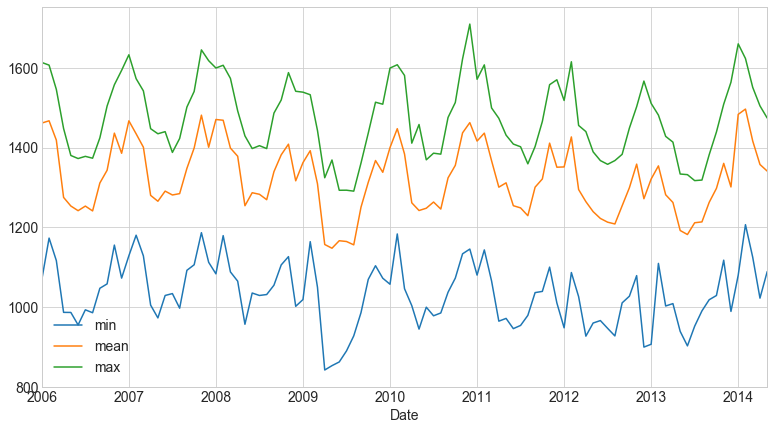

In [94]:
# min, mean, and max of target monthy
y2.resample('M').agg(['min', 'mean', 'max']).plot()

### Visualize change over time

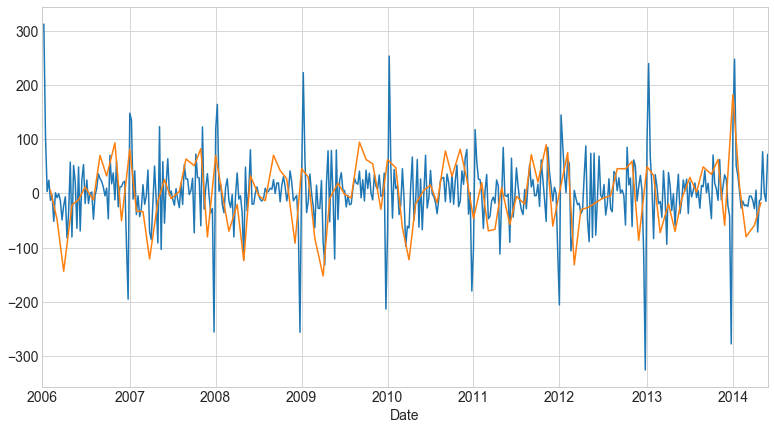

In [90]:
y2.resample('W').mean().diff().plot(label='Average week-to-week change in temperature')
y2.resample('M').mean().diff().plot(label='Average month-to-month change in temperature')

### Seasonal Plot

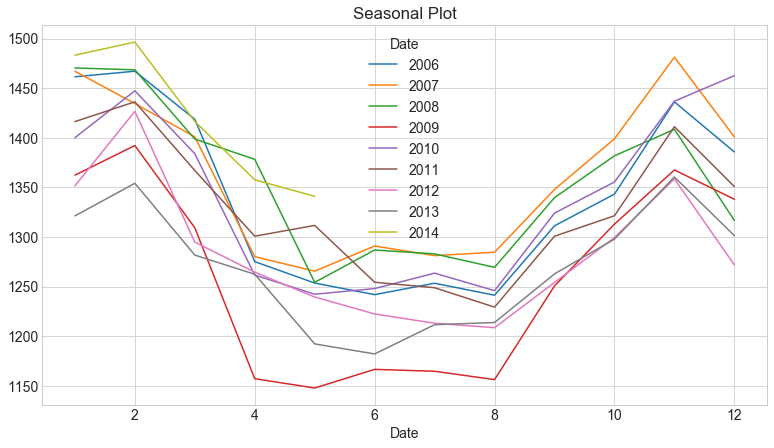

In [96]:
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Seasonal Subseries Plot

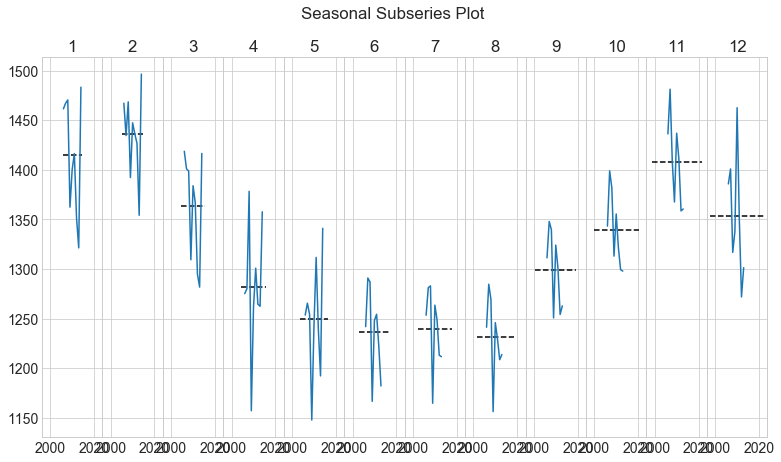

In [97]:
table = y2.groupby([y2.index.year, y2.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

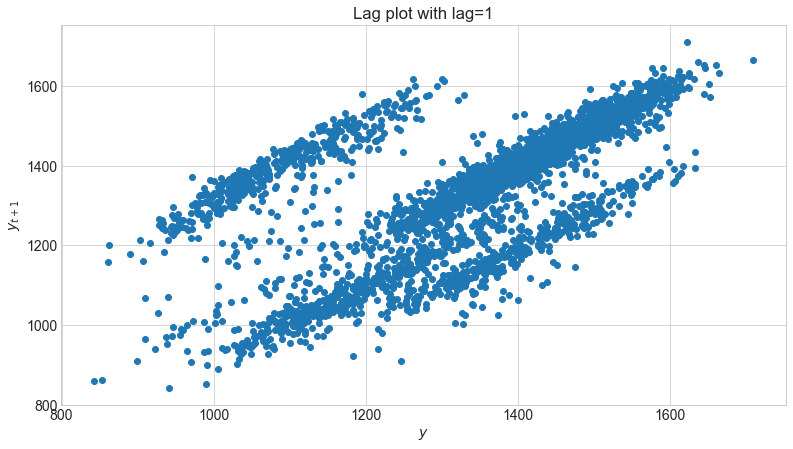

In [98]:
plt.scatter(y2, y2.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

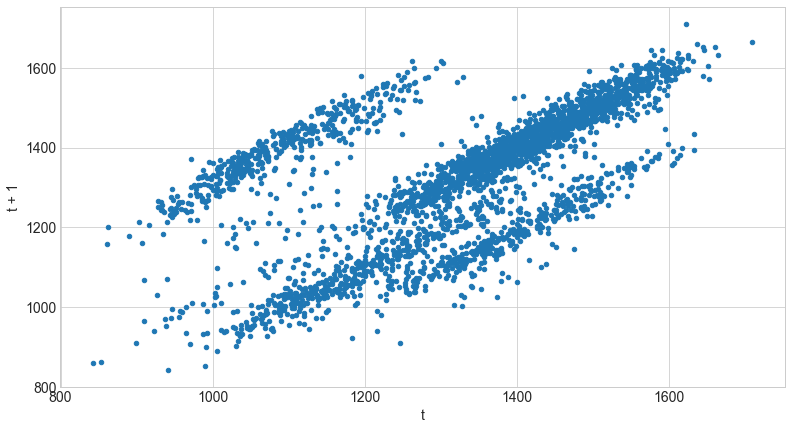

In [100]:
train2['y(t + 1)'] = train2.Consumption.shift(-1)
ax = train2.plot.scatter(x='Consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [102]:
del train2['y(t + 1)']

### Autocorrelation Plot

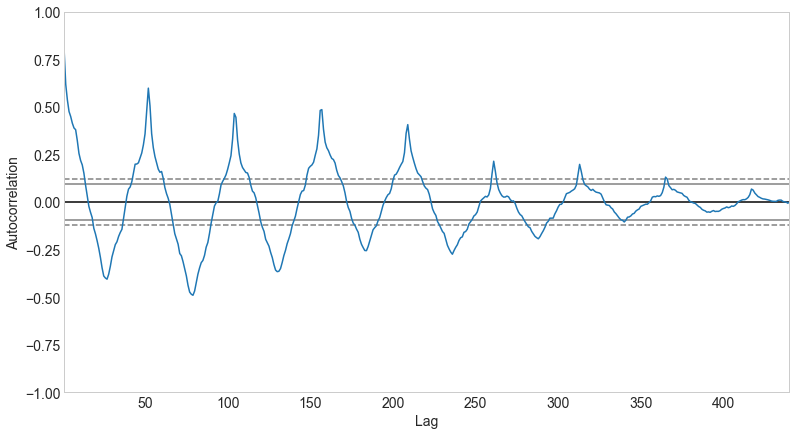

In [104]:
pd.plotting.autocorrelation_plot(train2.Consumption.resample('W').mean())

### Seasonal Decomposition

In [120]:
y = train2.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN
